# References

#### Examples
 - [Sample pipeline for text feature extraction and evaluation](https://scikit-learn.org/stable/auto_examples/model_selection/grid_search_text_feature_extraction.html)
 - [Column Transformer with Mixed Types](https://scikit-learn.org/stable/auto_examples/compose/plot_column_transformer_mixed_types.html#sphx-glr-auto-examples-compose-plot-column-transformer-mixed-types-py)
 - [A Deep Dive Into Sklearn Pipelines](https://www.kaggle.com/baghern/a-deep-dive-into-sklearn-pipelines)
 - [Introducing the ColumnTransformer](https://jorisvandenbossche.github.io/blog/2018/05/28/scikit-learn-columntransformer/)
 - [Selecting dimensionality reduction with Pipeline and GridSearchCV](https://scikit-learn.org/stable/auto_examples/compose/plot_compare_reduction.html)
 - [Using XGBoost with sklearn](https://www.kaggle.com/stuarthallows/using-xgboost-with-scikit-learn)
 
#### Documentation
 - [Pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html)
 - [FeatureUnion](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.FeatureUnion.html)
 - [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)
 - [ColumnTransformer](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html)
 - [LabelBinarizer](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelBinarizer.html)
 - [XGBoost](https://xgboost.readthedocs.io/en/latest/python/python_api.html)

# Starting Script

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import xgboost

%matplotlib inline

# Import data
data = pd.read_csv('../data/data_all_features.csv')
minimal_data = pd.read_csv('../data/data_selected_features.csv')
train_test_data = pickle.load(open("../data/train_test_data_all_features", "rb"))
minimal_train_test_data = pickle.load(open("../data/train_test_data_selected_features", "rb"))
model = pickle.load(open("../data/xgb_model_pickle_v2", "rb"))

# Get samples
sample_data = train_test_data['X_test'].assign(show_up = train_test_data['y_test']).reset_index(drop=True)
minimal_sample_data = minimal_train_test_data['X_test'].assign(show_up = minimal_train_test_data['y_test']).reset_index(drop=True)

np.random.seed(42)
indices = np.random.randint(0, len(train_test_data['y_test']), 10)
sample = sample_data.loc[indices]
minimal_sample = minimal_sample_data.loc[indices]

/opt/conda/lib/python3.6/site-packages/sklearn/base.py:253: UserWarning: Trying to unpickle estimator LabelEncoder from version 0.19.1 when using version 0.20.3. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [8]:
a = sum(data['show_up'] == 1)
b = sum(data['show_up'] == 0)
c = 300000

In [10]:
print(np.mean(minimal_train_test_data['y_test']))
print(np.mean(minimal_train_test_data['y_train']))

0.69892
0.697111111111


In [9]:
print(a / c)
print(b / c)

0.6975633333333333
0.3024366666666667


# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Data

In [2]:
# food = pd.read_csv('../scrapdata/FoodBalanceSheets_E_All_Data.csv', encoding = 'latin1')

In [2]:
vit = pd.read_csv('../data/no-show-300k.csv')

# Transformations required for modeling
def transform_vitoria(df):
    new_names = ['age', 'gender', 'app_registration', 'app_date', 'week_day', 'show_up',
                 'diabetes', 'alcoholism', 'hypertension', 'handicap', 'smokes', 
                 'monetary_help', 'tuberculosis', 'sms_reminder', 'days_to_appointment']
    new_order = ['age', 'gender', 'week_day', 'days_to_appointment', 'diabetes', 'alcoholism', 
                 'hypertension', 'handicap', 'smokes', 'monetary_help', 'tuberculosis', 
                 'sms_reminder', 'show_up']
    df.columns = new_names
    df = df.loc[:, new_order]
    df.loc[:, 'week_day'] = df.loc[:, 'week_day'].str.lower()
    df.loc[:, 'gender'] = df.loc[:, 'gender'].str.lower()
    df.loc[:, 'days_to_appointment'] = df.loc[:, 'days_to_appointment'] * -1
    df = df.replace({'show_up': {'Show-Up': 1, 'No-Show': 0, '2': 0}})
    
    return df

vit = transform_vitoria(vit)
vit.head()

,age,gender,week_day,days_to_appointment,diabetes,alcoholism,hypertension,handicap,smokes,monetary_help,tuberculosis,sms_reminder,show_up
0,19,m,wednesday,29,0,0,0,0,0,0,0,0,1
1,24,f,wednesday,1,0,0,0,0,0,0,0,0,1
2,4,f,tuesday,1,0,0,0,0,0,0,0,0,1
3,5,m,thursday,15,0,0,0,0,0,0,0,1,1
4,38,m,tuesday,6,0,0,0,0,0,0,0,1,1


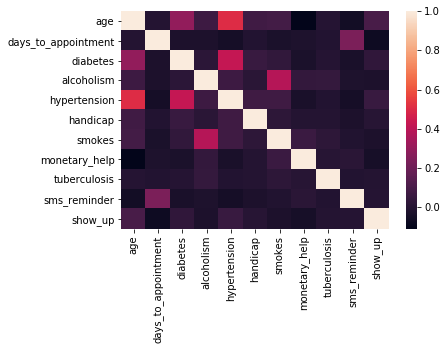

In [15]:
sns.heatmap(vit.corr("pearson"), annot=False)

In [13]:
vit.corr("spearman")

,age,days_to_appointment,diabetes,alcoholism,hypertension,handicap,smokes,monetary_help,tuberculosis,sms_reminder,show_up
age,1.000000,-0.076000,0.297305,0.075201,0.511573,0.082648,0.093173,-0.108838,0.001180,-0.052104,0.101835
days_to_appointment,-0.076000,1.000000,-0.051439,-0.025348,-0.081945,-0.021473,-0.030423,-0.000172,-0.007529,0.413095,-0.094293
diabetes,0.297305,-0.051439,1.000000,0.020542,0.424342,0.061046,0.038678,-0.027251,0.001451,-0.032531,0.031073
alcoholism,0.075201,-0.025348,0.020542,1.000000,0.069894,0.016721,0.385782,0.039615,0.045920,-0.019235,-0.025459
hypertension,0.511573,-0.081945,0.424342,0.069894,1.000000,0.083375,0.075977,-0.032419,-0.004639,-0.045788,0.059053
handicap,0.082648,-0.021473,0.061046,0.016721,0.083375,1.000000,0.025310,-0.004172,-0.002926,-0.023063,0.006691
smokes,0.093173,-0.030423,0.038678,0.385782,0.075977,0.025310,1.000000,0.064070,0.025349,-0.010658,-0.024055
monetary_help,-0.108838,-0.000172,-0.027251,0.039615,-0.032419,-0.004172,0.064070,1.000000,0.007927,0.015804,-0.041030
tuberculosis,0.001180,-0.007529,0.001451,0.045920,-0.004639,-0.002926,0.025349,0.007927,1.000000,-0.006754,-0.003823
sms_reminder,-0.052104,0.413095,-0.032531,-0.019235,-0.045788,-0.023063,-0.010658,0.015804,-0.006754,1.000000,0.000330


In [3]:
plotting_features = ['age', 'days_to_appointment']

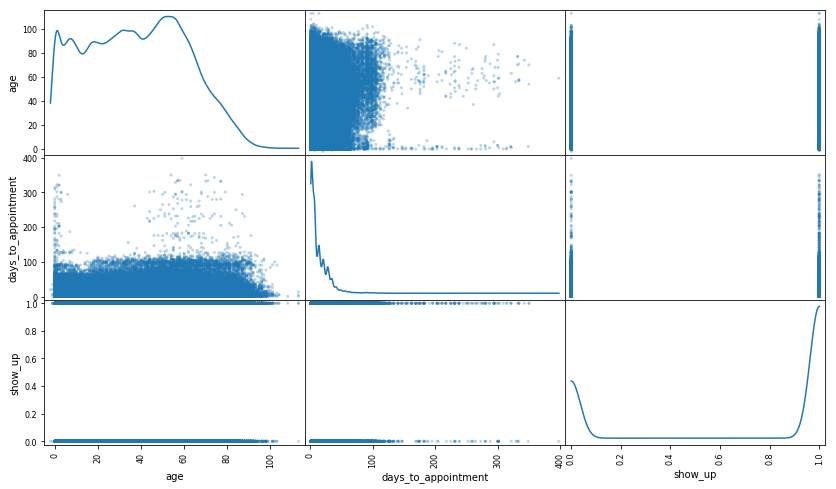

In [4]:
# Produce a scatter matrix for each pair of features in the data
pd.plotting.scatter_matrix(vit[plotting_features], alpha = 0.3, figsize = (14,8), diagonal = 'kde');

In [18]:
vit[['age', 'days_to_appointment']].describe()

,age,days_to_appointment
count,300000.000000,300000.000000
mean,37.808017,13.841813
std,22.809014,15.687697
min,-2.000000,1.000000
25%,19.000000,4.000000
50%,38.000000,8.000000
75%,56.000000,20.000000
max,113.000000,398.000000


# Visualization

/opt/conda/lib/python3.6/site-packages/numpy/core/_methods.py:82: RuntimeWarning: Degrees of freedom <= 0 for slice
  warnings.warn("Degrees of freedom <= 0 for slice", RuntimeWarning)
/opt/conda/lib/python3.6/site-packages/numpy/core/_methods.py:116: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


(0, 100)

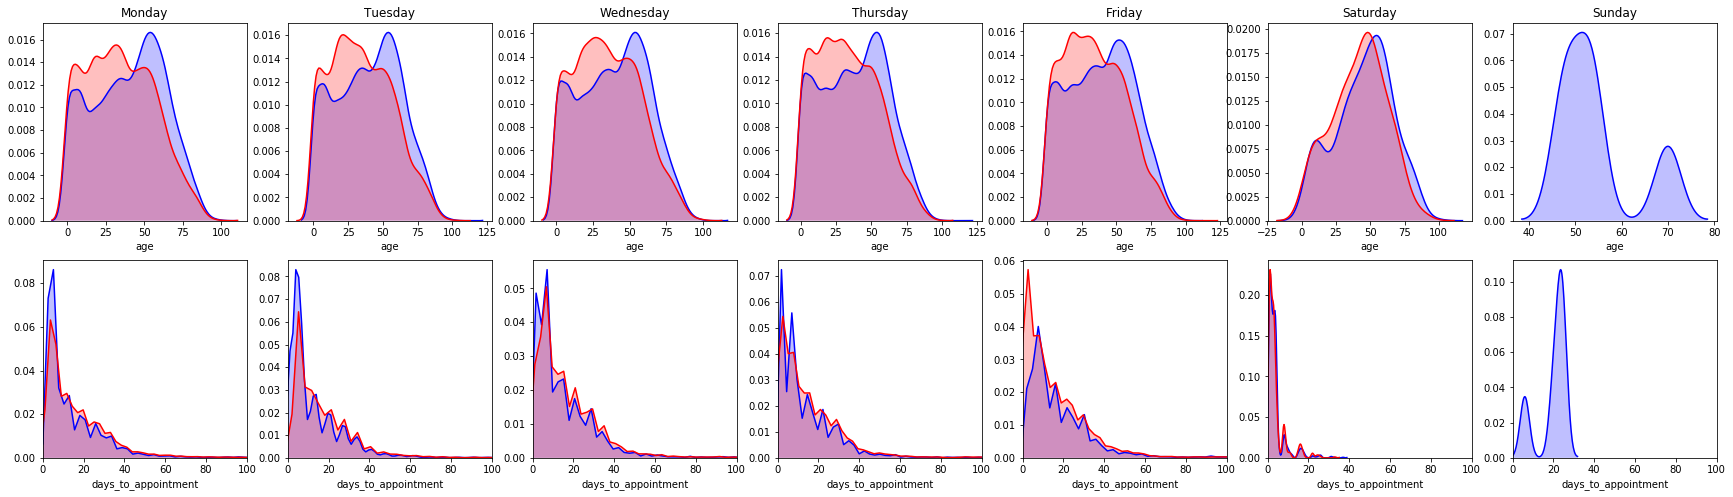

In [16]:
fig, ax = plt.subplots(2, 7, figsize=(30, 8))

sns.distplot(vit.loc[vit.show_up == 1].loc[vit.week_day == 'monday'].age, color='blue', hist=False, kde_kws={'shade':True}, ax=ax[0,0])
sns.distplot(vit.loc[vit.show_up == 0].loc[vit.week_day == 'monday'].age, color='red', hist=False, kde_kws={'shade':True}, ax=ax[0,0])
ax[0,0].set_title('Monday')

sns.distplot(vit.loc[vit.show_up == 1].loc[vit.week_day == 'tuesday'].age, color='blue', hist=False, kde_kws={'shade':True}, ax=ax[0,1])
sns.distplot(vit.loc[vit.show_up == 0].loc[vit.week_day == 'tuesday'].age, color='red', hist=False, kde_kws={'shade':True}, ax=ax[0,1])
ax[0,1].set_title('Tuesday')

sns.distplot(vit.loc[vit.show_up == 1].loc[vit.week_day == 'wednesday'].age, color='blue', hist=False, kde_kws={'shade':True}, ax=ax[0,2])
sns.distplot(vit.loc[vit.show_up == 0].loc[vit.week_day == 'wednesday'].age, color='red', hist=False, kde_kws={'shade':True}, ax=ax[0,2])
ax[0,2].set_title('Wednesday')

sns.distplot(vit.loc[vit.show_up == 1].loc[vit.week_day == 'thursday'].age, color='blue', hist=False, kde_kws={'shade':True}, ax=ax[0,3])
sns.distplot(vit.loc[vit.show_up == 0].loc[vit.week_day == 'thursday'].age, color='red', hist=False, kde_kws={'shade':True}, ax=ax[0,3])
ax[0,3].set_title('Thursday')

sns.distplot(vit.loc[vit.show_up == 1].loc[vit.week_day == 'friday'].age, color='blue', hist=False, kde_kws={'shade':True}, ax=ax[0,4])
sns.distplot(vit.loc[vit.show_up == 0].loc[vit.week_day == 'friday'].age, color='red', hist=False, kde_kws={'shade':True}, ax=ax[0,4])
ax[0,4].set_title('Friday')

sns.distplot(vit.loc[vit.show_up == 1].loc[vit.week_day == 'saturday'].age, color='blue', hist=False, kde_kws={'shade':True}, ax=ax[0,5])
sns.distplot(vit.loc[vit.show_up == 0].loc[vit.week_day == 'saturday'].age, color='red', hist=False, kde_kws={'shade':True}, ax=ax[0,5])
ax[0,5].set_title('Saturday')

sns.distplot(vit.loc[vit.show_up == 1].loc[vit.week_day == 'sunday'].age, color='blue', hist=False, kde_kws={'shade':True}, ax=ax[0,6])
sns.distplot(vit.loc[vit.show_up == 0].loc[vit.week_day == 'sunday'].age, color='red', hist=False, kde_kws={'shade':True}, ax=ax[0,6])
ax[0,6].set_title('Sunday')

sns.distplot(vit.loc[vit.show_up == 1].loc[vit.week_day == 'monday'].days_to_appointment, color='blue', hist=False, kde_kws={'shade':True}, ax=ax[1,0])
sns.distplot(vit.loc[vit.show_up == 0].loc[vit.week_day == 'monday'].days_to_appointment, color='red', hist=False, kde_kws={'shade':True}, ax=ax[1,0])
ax[1,0].set_xlim(0, 100)

sns.distplot(vit.loc[vit.show_up == 1].loc[vit.week_day == 'tuesday'].days_to_appointment, color='blue', hist=False, kde_kws={'shade':True}, ax=ax[1,1])
sns.distplot(vit.loc[vit.show_up == 0].loc[vit.week_day == 'tuesday'].days_to_appointment, color='red', hist=False, kde_kws={'shade':True}, ax=ax[1,1])
ax[1,1].set_xlim(0, 100)

sns.distplot(vit.loc[vit.show_up == 1].loc[vit.week_day == 'wednesday'].days_to_appointment, color='blue', hist=False, kde_kws={'shade':True}, ax=ax[1,2])
sns.distplot(vit.loc[vit.show_up == 0].loc[vit.week_day == 'wednesday'].days_to_appointment, color='red', hist=False, kde_kws={'shade':True}, ax=ax[1,2])
ax[1,2].set_xlim(0, 100)

sns.distplot(vit.loc[vit.show_up == 1].loc[vit.week_day == 'thursday'].days_to_appointment, color='blue', hist=False, kde_kws={'shade':True}, ax=ax[1,3])
sns.distplot(vit.loc[vit.show_up == 0].loc[vit.week_day == 'thursday'].days_to_appointment, color='red', hist=False, kde_kws={'shade':True}, ax=ax[1,3])
ax[1,3].set_xlim(0, 100)

sns.distplot(vit.loc[vit.show_up == 1].loc[vit.week_day == 'friday'].days_to_appointment, color='blue', hist=False, kde_kws={'shade':True}, ax=ax[1,4])
sns.distplot(vit.loc[vit.show_up == 0].loc[vit.week_day == 'friday'].days_to_appointment, color='red', hist=False, kde_kws={'shade':True}, ax=ax[1,4])
ax[1,4].set_xlim(0, 100)

sns.distplot(vit.loc[vit.show_up == 1].loc[vit.week_day == 'saturday'].days_to_appointment, color='blue', hist=False, kde_kws={'shade':True}, ax=ax[1,5])
sns.distplot(vit.loc[vit.show_up == 0].loc[vit.week_day == 'saturday'].days_to_appointment, color='red', hist=False, kde_kws={'shade':True}, ax=ax[1,5])
ax[1,5].set_xlim(0, 100)

sns.distplot(vit.loc[vit.show_up == 1].loc[vit.week_day == 'sunday'].days_to_appointment, color='blue', hist=False, kde_kws={'shade':True}, ax=ax[1,6])
sns.distplot(vit.loc[vit.show_up == 0].loc[vit.week_day == 'sunday'].days_to_appointment, color='red', hist=False, kde_kws={'shade':True}, ax=ax[1,6])
ax[1,6].set_xlim(0, 100)

In [ ]:
plt.scatter(data.age, data.days_to_appointment, c=data.show_up, alpha=0.5)

---

# Preprocessing

In [4]:
# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split


data = pd.get_dummies(vit)
#encoder = OneHotEncoder(sparse=False)

#categorical_features = ['gender', 'week_day']
#categorical_encoder = OneHotEncoder(sparse=False)
#categorical_transformer = ColumnTransformer([('cat', categorical_encoder, categorical_features)], remainder='passthrough')

#preprocess = Pipeline([('cat_transformer', categorical_transformer)])

X = data.drop('show_up', axis=1)
y = data.loc[:, 'show_up']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# XGBoostClassifier

In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score
from xgboost import XGBClassifier

clf = XGBClassifier(n_estimators=100, n_jobs=4, silent=False)

grid_params = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.3, 0.5]
}

scorer = make_scorer(f1_score)

def custom_f1_eval(y_pred, y_true):
    labels = y_true.get_label()
    y_bin = [1. if y_cont > 0.5 else 0. for y_cont in y_pred]
    return 'f1_score', f1_score(labels, y_bin)

fit_params = {
    'eval_set': [(X_test, y_test)],
    'eval_metric': custom_f1_eval,
    'early_stopping_rounds': 20,
    'verbose': True
}

grid = GridSearchCV(clf, grid_params, cv=5, n_jobs=-1, verbose=True, scoring=scorer)

In [18]:
grid.fit(X_train, y_train, **fit_params)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[0]	validation_0-error:0.30108	validation_0-f1_score:0.822782
Multiple eval metrics have been passed: 'validation_0-f1_score' will be used for early stopping.

Will train until validation_0-f1_score hasn't improved in 20 rounds.
[0]	validation_0-error:0.30108	validation_0-f1_score:0.822782
Multiple eval metrics have been passed: 'validation_0-f1_score' will be used for early stopping.

Will train until validation_0-f1_score hasn't improved in 20 rounds.
[0]	validation_0-error:0.30108	validation_0-f1_score:0.822782
Multiple eval metrics have been passed: 'validation_0-f1_score' will be used for early stopping.

Will train until validation_0-f1_score hasn't improved in 20 rounds.
[0]	validation_0-error:0.30108	validation_0-f1_score:0.822782
Multiple eval metrics have been passed: 'validation_0-f1_score' will be used for early stopping.

Will train until validation_0-f1_score hasn't improved in 20 rounds.
[1]	validation_0-error:0

[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed: 23.8min finished


[0]	validation_0-error:0.30108	validation_0-f1_score:0.822782
Multiple eval metrics have been passed: 'validation_0-f1_score' will be used for early stopping.

Will train until validation_0-f1_score hasn't improved in 20 rounds.
[1]	validation_0-error:0.30108	validation_0-f1_score:0.822782
[2]	validation_0-error:0.30108	validation_0-f1_score:0.822782
[3]	validation_0-error:0.30108	validation_0-f1_score:0.822782
[4]	validation_0-error:0.30108	validation_0-f1_score:0.822782
[5]	validation_0-error:0.30108	validation_0-f1_score:0.822782
[6]	validation_0-error:0.30108	validation_0-f1_score:0.822782
[7]	validation_0-error:0.30108	validation_0-f1_score:0.822782
[8]	validation_0-error:0.30108	validation_0-f1_score:0.822782
[9]	validation_0-error:0.30108	validation_0-f1_score:0.822782
[10]	validation_0-error:0.30108	validation_0-f1_score:0.822782
[11]	validation_0-error:0.30108	validation_0-f1_score:0.822782
[12]	validation_0-error:0.30108	validation_0-f1_score:0.822782
[13]	validation_0-error:

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=4, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=False, subsample=1),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': [3, 5, 7], 'learning_rate': [0.1, 0.3, 0.5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=make_scorer(f1_score), verbose=True)

In [19]:
best = grid.best_estimator_

In [20]:
preds = best.predict(X_test)

### After learning best parameters

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score
from xgboost import XGBClassifier

clf = XGBClassifier(n_estimators=100, n_jobs=4, silent=False, max_depth=3, learning_rate=0.1)

fit_params = {
    'eval_set': [(X_test, y_test)],
    'eval_metric': custom_f1_eval,
    'early_stopping_rounds': 20,
    'verbose': True
}

xgb_model = clf.fit(X_train, y_train, **fit_params)

# Exporting model

In [48]:
import pickle

# pickle.dump(best, open("../data/xgb_model_pickle_v2", "wb"))
# best.save_model("../data/xgb_model_v2")

# Loading model

In [73]:
import pickle
import xgboost

model = pickle.load(open("../data/xgb_model_pickle_v2", "rb"))

/opt/conda/lib/python3.6/site-packages/sklearn/base.py:253: UserWarning: Trying to unpickle estimator LabelEncoder from version 0.19.1 when using version 0.20.3. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


# Exploring model

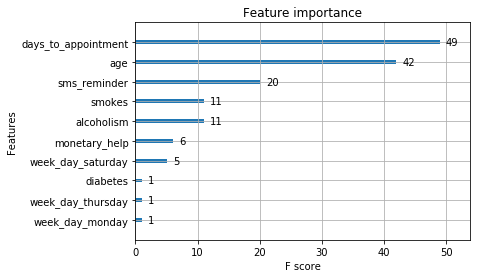

In [74]:
from xgboost import plot_importance
plot_importance(model)

# Feature Selection

In [3]:
def filter_relevant_features(table, fraction):
    """
    Helper to get features with importance above 0.1 of maximum value
    """
    
    return table[table['mi'] > max(table['mi']) * fraction].iloc[:, 0]

def intersect_features(table1, table2, fraction):
    """
    Helper to get intersection of relevant features from two tables
    """
    
    features_i = filter_relevant_features(table1, fraction)
    features_j = filter_relevant_features(table2, fraction)
    
    return list(set(features_i) & set(features_j))

In [6]:
train_test_data['X_train'].shape

(225000, 19)

<BarContainer object of 19 artists>

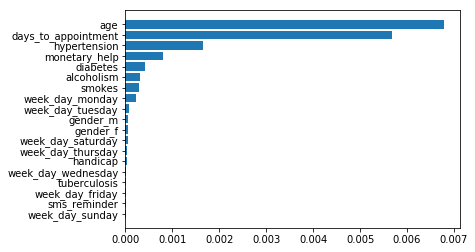

In [7]:
from helper import intersect_features
from sklearn.feature_selection import mutual_info_classif

discrete_idx = [i for i in range(2, 19)]
selection_scores = mutual_info_classif(train_test_data['X_train'], train_test_data['y_train'], discrete_idx)
mi_table = pd.DataFrame({'var': train_test_data['X_train'].columns, 'mi': selection_scores}).sort_values('mi', ascending=True)

plt.barh(mi_table['var'], mi_table['mi'])

<BarContainer object of 19 artists>

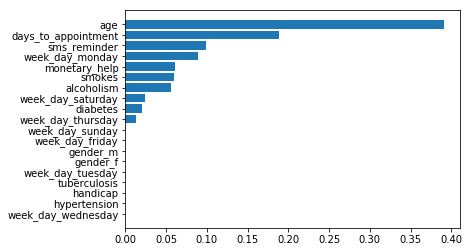

In [8]:
selection_table = pd.DataFrame({'var': train_test_data['X_train'].columns, 'mi': model.feature_importances_}).sort_values('mi', ascending=True)

plt.barh(selection_table['var'], selection_table['mi'])

In [9]:
mutual_features = intersect_features(selection_table, mi_table, 0.1)
print(mutual_features)

['monetary_help', 'age', 'days_to_appointment']


In [12]:
minimal_data = data.loc[:, mutual_features + ['show_up']]

### Supervised learning after feature selection

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score
from xgboost import XGBClassifier

clf = XGBClassifier(n_estimators=100, n_jobs=4, silent=False)

grid_params = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.3, 0.5]
}

scorer = make_scorer(f1_score)

def custom_f1_eval(y_pred, y_true):
    labels = y_true.get_label()
    y_bin = [1. if y_cont > 0.5 else 0. for y_cont in y_pred]
    return 'f1_score', f1_score(labels, y_bin)

fit_params = {
    'eval_set': [(X_test, y_test)],
    'eval_metric': custom_f1_eval,
    'early_stopping_rounds': 20,
    'verbose': True
}

grid = GridSearchCV(clf, grid_params, cv=5, n_jobs=-1, verbose=True, scoring=scorer)

In [55]:
from sklearn.metrics import make_scorer, f1_score, fbeta_score
from xgboost import XGBClassifier

clf = XGBClassifier(n_estimators=1000, n_jobs=4, silent=False, max_depth=3, learning_rate=0.3)

def custom_f1_eval(y_pred, y_true):
    labels = y_true.get_label()
    y_bin = [1. if y_cont > 0.5 else 0. for y_cont in y_pred]
    # return 'f1_score', f1_score(labels, y_bin)
    return 'fbeta_score', 1 - fbeta_score(labels, y_bin, beta=0.5)

model = clf.fit(minimal_train_test_data['X_train'], 
                minimal_train_test_data['y_train'], 
                eval_set=[(minimal_train_test_data['X_test'], minimal_train_test_data['y_test'])], 
                eval_metric='auc', 
                early_stopping_rounds=100, 
                verbose=False)
preds = model.predict(minimal_train_test_data['X_test'])

In [4]:
from sklearn.metrics import confusion_matrix

In [5]:
zero_sample = minimal_train_test_data['X_test'].assign(show_up = minimal_train_test_data['y_test']).reset_index(drop = True)
zero_sample = zero_sample[zero_sample['show_up'] == 0]

In [6]:
X = zero_sample.drop('show_up', axis=1)
y = zero_sample.loc[:, 'show_up']

In [7]:
y[1] = 1

In [21]:
preds = model.predict_proba(X)

In [22]:
y_bin = np.array([1. if y_cont[1] > 0.5 else 0. for y_cont in preds])

In [23]:
np.set_printoptions(suppress=True)
unique_elements, counts_elements = np.unique(y_bin, return_counts=True)
print(np.asarray((unique_elements, counts_elements)))

[[     0.      1.]
 [   121.  22460.]]


In [42]:
np.set_printoptions(suppress=True)
unique_elements, counts_elements = np.unique(minimal_train_test_data['y_test'], return_counts=True)
print(np.asarray((unique_elements, counts_elements)))

[[    0     1]
 [22581 52419]]


In [32]:
preds = model.predict(X)
preds_proba = model.predict_proba(X)
y_bin = np.array([1. if y_cont[1] > 0.75 else 0. for y_cont in preds_proba])
print(fbeta_score(y, preds, beta=0.5))
print(fbeta_score(y, y_bin, beta=0.5))
print(f1_score(y, y_bin))
print('\nConfusion Matrix')
print(confusion_matrix(y, y_bin))

5.56538774056e-05
0.000304785126486
0.000487567040468

Confusion Matrix
[[18480  4100]
 [    0     1]]


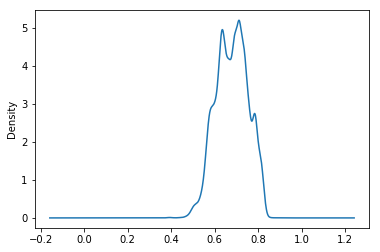

In [36]:
pd.Series([i[1] for i in preds_proba]).plot.kde()

In [25]:
preds = model.predict(minimal_train_test_data['X_test'])
print(confusion_matrix(minimal_train_test_data['y_test'], preds))

[[  121 22460]
 [  110 52309]]


In [52]:
probs_zero = [i[1] for i in model.predict_proba(X)]
probs_all = [i[1] for i in model.predict_proba(minimal_train_test_data['X_test'])]

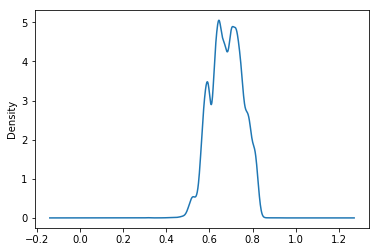

In [53]:
pd.Series(probs_zero).plot.kde()

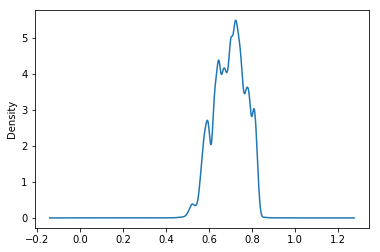

In [54]:
pd.Series(probs_all).plot.kde()

In [156]:
np.array(zero_sample.loc[:, 'show_up'])

array([0, 0, 0, ..., 0, 0, 0])

# Clustering

### Test removing features

In [10]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

clusterer = GaussianMixture(n_components=12).fit(minimal_data)
centers = clusterer.means_

clustered_data = minimal_data.assign(cluster = pd.Series(preds))
preds_proba = clusterer.predict_proba(minimal_sample)
preds_deter = clusterer.predict(minimal_sample)

pivot = clustered_data.pivot_table(index='cluster', values=mutual_features + ['show_up'], aggfunc='mean')
pivot = pivot.assign(count = clustered_data.groupby('cluster')['show_up'].aggregate('count'))
pivot

,age,days_to_appointment,monetary_help,show_up,count
cluster,,,,,
0,36.984375,110.671875,1,0.984375,64
1,31.310107,11.928433,1,1.000000,18542
2,19.661017,70.254237,1,0.000000,59
3,60.916849,69.653173,0,1.000000,914
4,51.268293,69.000000,1,0.000000,41
5,36.677863,40.033588,1,0.000000,655
6,5.644720,16.298137,1,0.000000,1610
7,54.055428,94.149794,0,0.697206,2183
8,35.014308,14.759587,0,0.000000,79534


In [43]:
def calc_distance(a, b):
    return np.sqrt((np.array(a) - np.array(b))**2).sum()

In [72]:
def calc_distances(a, centers, indexes):
    return {i: calc_distance(a[indexes], j[indexes]) for i, j in enumerate(centers)}

In [78]:
def distances(individuals, centers, indexes):    
    return np.array([calc_distances(np.array(j), centers, indexes) for i, j in individuals.iterrows()])

In [ ]:
def recommend(data, pivot, centers, rec_index, input_indexes):
    individuals_distances = distances(data, centers, input_indexes)
    valid_clusters = [i for i, j in enumerate(centers) if j[3] > 0.5]
    valid_distances = {k: v for k, v in individuals_distances[0].items() if k in valid_clusters}
    recommended_values = {k: v[0] for k, v in enumerate(centers) if k in valid_clusters}
    recommended_cluster = min(valid_distances, key=valid_distances.get)
    recommended_value = int(recommended_values[recommended_cluster])

In [99]:
min({'a': 5, 'b': 10})

'a'

In [116]:
individuals_distances = distances(minimal_sample, centers, [1, 2])
valid_clusters = [i for i, j in enumerate(centers) if j[3] > 0.5]
recommended_values = {k: v[0] for k, v in enumerate(centers) if k in valid_clusters}

for individual_distance in individuals_distances:
    valid_distances = {k: v for k, v in individual_distance.items() if k in valid_clusters}
    recommended_cluster = min(valid_distances, key=valid_distances.get)
    recommended_value = int(recommended_values[recommended_cluster])
    
    

209
11
90
68
11
209
209
11
11
11


In [26]:
for index, row in minimal_sample.iterrows():
    a = np.array(row)[1:3]
    print(a)
    
for i in centers:
    print(i[1:3])

[42  0]
[33  1]
[50  0]
[67  0]
[7 1]
[45  0]
[46  0]
[8 0]
[6 0]
[20  0]
[ 35.93987253   1.        ]
[ 31.31167111   1.        ]
[ 19.67872453   1.        ]
[ 66.55765298   0.        ]
[ 45.02566279   1.        ]
[ 36.51986346   1.        ]
[ 6.13192923  1.        ]
[ 54.98911325   0.        ]
[ 35.01027481   0.        ]
[ 39.90425757   0.        ]
[ 43.76146678   0.        ]
[ 31.19682362   1.        ]


In [11]:
centers

array([[ 109.61294523,   35.93987253,    1.        ,    0.97002754],
       [  11.92592992,   31.31167111,    1.        ,    1.        ],
       [  56.28029461,   19.67872453,    1.        ,    0.        ],
       [  68.54161038,   66.55765298,    0.        ,    1.        ],
       [  63.8676629 ,   45.02566279,    1.        ,    0.        ],
       [  39.3000822 ,   36.51986346,    1.        ,    0.        ],
       [  16.74018773,    6.13192923,    1.        ,    0.        ],
       [  90.9164358 ,   54.98911325,    0.        ,    0.73816831],
       [  14.75238277,   35.01027481,    0.        ,    0.        ],
       [  12.30164961,   39.90425757,    0.        ,    1.        ],
       [ 209.56583127,   43.76146678,    0.        ,    0.68014824],
       [  11.33280579,   31.19682362,    1.        ,    0.        ]])

In [390]:
minimal_sample

,days_to_appointment,age,monetary_help,show_up
15795,7,42,0,1
860,7,33,1,1
54886,6,50,0,1
6265,15,67,0,1
37194,33,7,1,0
44131,17,45,0,1
60263,15,46,0,1
16023,7,8,0,0
41090,6,6,0,0
67221,1,20,0,1


In [290]:
def recommend_days(data, var_index, clusterer):
    
    allowed_clusters=[0, 3, 4, 5, 11]
    rec = []
    
    for index, row in data.iterrows():
        days = row[var_index]
        selected_days = [i for i in range(1, 365)]
        np.random.shuffle(selected_days)
        j = np.array(row).reshape(1, -1)
    
        while len(selected_days) != 0:
            pred = clusterer.predict(j)
            if pred not in allowed_clusters:
                days = selected_days[0]
                selected_days.pop(0)
                j[0][0] = days
            else:
                break
    
        if len(selected_days) == 0:
            rec.append(0)
        else:
            rec.append(days)
    
    return rec

In [450]:
def recommend_days_proba(data, var_index, clusterer):
    
    allowed_clusters=[0, 3, 4, 5, 7, 11]
    rec = []
    
    for index, row in data.iterrows():
        days = row[var_index]
        selected_days = [i for i in range(1, 365)]
        np.random.shuffle(selected_days)
        j = np.array(row).reshape(1, -1)
    
        while len(selected_days) != 0:
            j[0][3] = 1
            pred = clusterer.predict_proba(j)
            keys = [int(i) for i, prob in enumerate(pred[0]) if prob > 0.01]
            allowed = any([i in allowed_clusters for i in keys])
            
            if not allowed:
                print(days)
                days = selected_days[0]
                selected_days.pop(0)
                j[0][0] = days
            else:
                break
    
        if len(selected_days) == 0:
            rec.append(None)
        else:
            rec.append(days)
    
    return rec

In [437]:
a = minimal_data[minimal_data['show_up'] == 0]

In [451]:
recommend_days_proba(minimal_data[minimal_data['show_up'] == 0], 0, clusterer)

[35,
 17,
 6,
 2,
 5,
 14,
 30,
 4,
 14,
 39,
 21,
 2,
 1,
 18,
 10,
 38,
 6,
 33,
 15,
 5,
 2,
 65,
 18,
 7,
 10,
 14,
 27,
 5,
 35,
 2,
 11,
 29,
 19,
 8,
 2,
 7,
 12,
 4,
 1,
 22,
 11,
 6,
 8,
 8,
 7,
 13,
 10,
 35,
 18,
 7,
 25,
 5,
 14,
 14,
 33,
 29,
 33,
 9,
 3,
 1,
 2,
 76,
 19,
 9,
 11,
 2,
 2,
 12,
 22,
 29,
 13,
 2,
 5,
 13,
 35,
 34,
 7,
 6,
 6,
 28,
 7,
 13,
 1,
 15,
 7,
 36,
 2,
 35,
 15,
 9,
 14,
 2,
 14,
 2,
 2,
 6,
 36,
 12,
 2,
 37,
 2,
 7,
 27,
 30,
 9,
 2,
 14,
 30,
 2,
 14,
 10,
 8,
 5,
 49,
 3,
 1,
 3,
 9,
 21,
 15,
 20,
 15,
 6,
 5,
 5,
 19,
 12,
 47,
 15,
 2,
 9,
 56,
 8,
 42,
 20,
 10,
 2,
 14,
 3,
 3,
 4,
 19,
 48,
 7,
 5,
 5,
 19,
 35,
 7,
 12,
 2,
 2,
 14,
 46,
 13,
 5,
 15,
 36,
 2,
 2,
 3,
 6,
 12,
 6,
 14,
 36,
 8,
 84,
 7,
 7,
 16,
 2,
 9,
 5,
 7,
 1,
 28,
 10,
 20,
 15,
 6,
 29,
 6,
 8,
 25,
 1,
 33,
 2,
 6,
 25,
 1,
 4,
 8,
 28,
 6,
 27,
 3,
 4,
 29,
 35,
 8,
 4,
 6,
 21,
 34,
 8,
 3,
 1,
 1,
 2,
 47,
 10,
 25,
 31,
 3,
 2,
 36,
 2,
 1,
 4,
 89,
 17,
 

In [447]:
allowed_clusters = [0, 3, 4, 5, 7, 11]
rec = []
for index, row in minimal_sample.iterrows():
    days = row[0]
    selected_days = [i for i in range(1, 365)]
    np.random.shuffle(selected_days)
    j = np.array(row).reshape(1, -1)
    
    while len(selected_days) != 0:
        j[0][3] = 1
        pred = clusterer.predict_proba(j)
        # pred = {id: prob for id, prob in enumerate(pred[0]) if prob > 0.01}
        # keys = [int(i) for i in pred]
        
        keys = [int(i) for i, prob in enumerate(pred[0]) if prob > 0.01]
        allowed = any([i in allowed_clusters for i in keys])
        
        if not allowed:
            days = selected_days[0]
            selected_days.pop(0)
            j[0][0] = days
        else:
            break
    
    if len(selected_days) == 0:
        rec.append(None)
    else:
        rec.append(days)

rec

[7, 7, 6, 15, 33, 17, 15, 7, 6, 1]

In [393]:
list(minimal_sample.iloc[:, 0])

[7, 7, 6, 15, 33, 17, 15, 7, 6, 1]

In [325]:
allowed_clusters = [0, 3, 4, 5, 11]
rec = []
for index, row in minimal_sample.iterrows():
    days = row[0]
    selected_days = [i for i in range(1, 365)]
    np.random.shuffle(selected_days)
    j = np.array(row).reshape(1, -1)
    
    while len(selected_days) != 0:
        pred = clusterer.predict(j)        
        if pred not in allowed_clusters:
            days = selected_days[0]
            selected_days.pop(0)
            j[0][0] = days
        else:
            break
    
    if len(selected_days) == 0:
        rec.append(0)
    else:
        rec.append(days)

rec

[7, 7, 6, 15, 0, 17, 15, 0, 0, 1]

In [95]:
pd.DataFrame(preds_proba).apply(lambda x: x.round(4))

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.0000,0.0000,0.0000,0.0000,0.0,0.1203,0.0000,0.0,0.0000,0.0000,0.0,0.8797
1,0.1579,0.0000,0.0000,0.8421,0.0,0.0000,0.0000,0.0,0.0000,0.0000,0.0,0.0000
2,0.0000,0.0000,0.0000,0.0000,0.0,0.0821,0.0000,0.0,0.0000,0.0000,0.0,0.9179
3,0.0000,0.0000,0.0000,0.0000,0.0,0.9969,0.0000,0.0,0.0000,0.0000,0.0,0.0031
4,0.0000,0.7625,0.0000,0.0000,0.0,0.0000,0.2375,0.0,0.0000,0.0000,0.0,0.0000
5,0.0000,0.0000,0.0000,0.0000,0.0,0.9998,0.0000,0.0,0.0000,0.0000,0.0,0.0002
6,0.0000,0.0000,0.0000,0.0000,0.0,0.9962,0.0000,0.0,0.0000,0.0000,0.0,0.0038
7,0.0000,0.0000,0.2196,0.0000,0.0,0.0000,0.0000,0.0,0.7749,0.0055,0.0,0.0000
8,0.0000,0.0000,0.1565,0.0000,0.0,0.0000,0.0000,0.0,0.8392,0.0043,0.0,0.0000
9,0.0000,0.0000,0.0000,0.0000,0.0,0.1511,0.0000,0.0,0.0000,0.0000,0.0,0.8489


In [196]:
[(i - min(i)) / (max(i) - min(i)) for i in preds_proba]

[array([  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   6.03978896e-02,
          0.00000000e+00,   5.95178373e-24,   1.00000000e+00]),
 array([  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   2.18204885e-02,
          0.00000000e+00,   3.79385421e-25,   1.00000000e+00]),
 array([  0.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   1.55608351e-01,   0.00000000e+00,
          0.00000000e+00,   1.08251452e-06,   0.00000000e+00]),
 array([  0.00000000e+00,   5.85575429e-19,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   3.66897812e-06,   0.00000000e+00]),


### Applying PCA

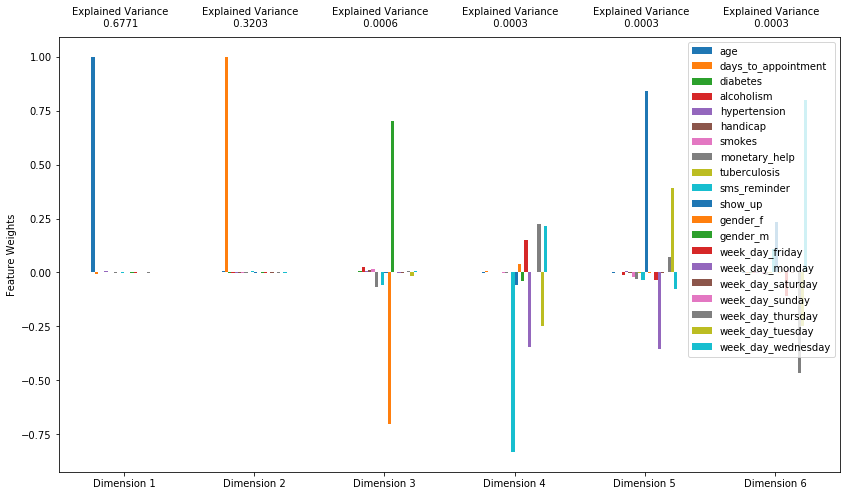

In [7]:
# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
from sklearn.decomposition import PCA
import visuals as vs

pca = PCA(n_components=6).fit(data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(data)

# Generate PCA results plot
pca_results = vs.pca_results(data, pca)

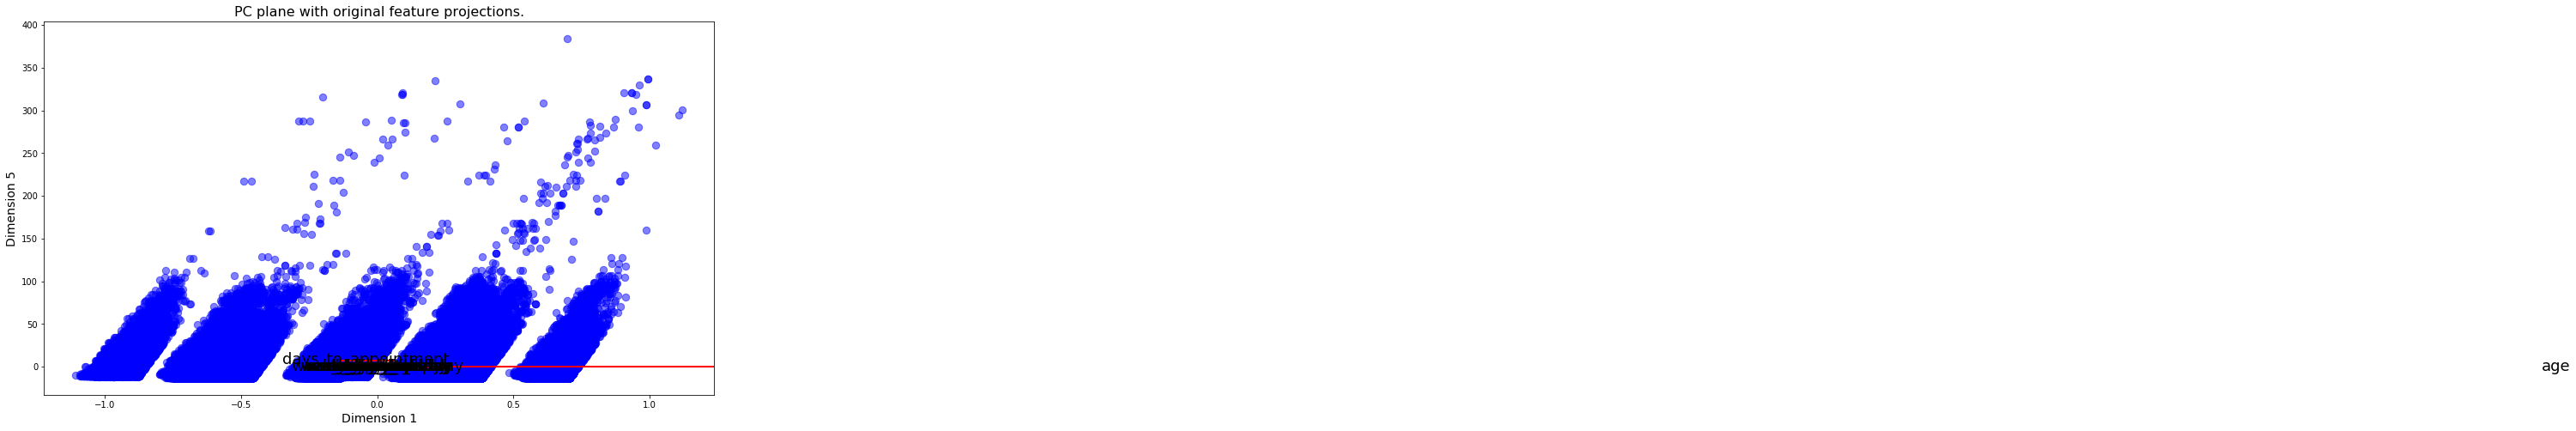

In [18]:
pca = PCA(n_components=6).fit(data)
pca_data = pca.transform(data)[:, [4, 1]]
pca_data = pd.DataFrame(pca_data, columns = ['Dimension 1', 'Dimension 5'])
vs.biplot(data, pca_data, pca)

In [8]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2).fit(data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(data)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

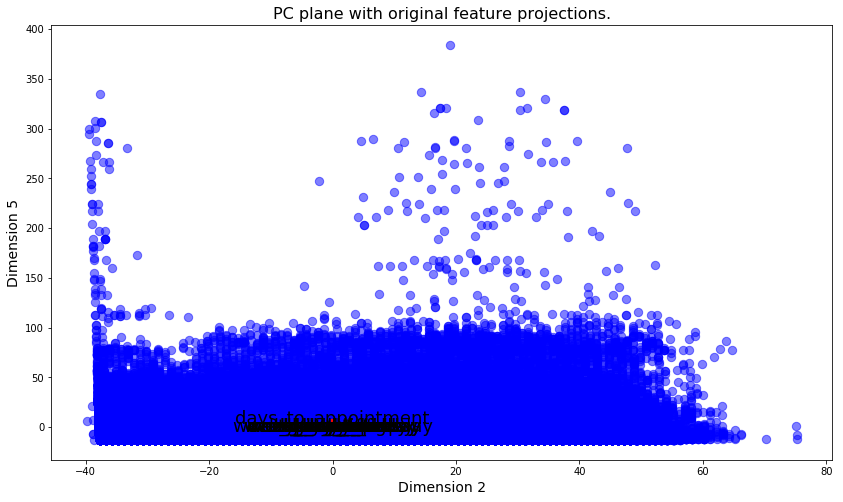

In [9]:
# Create a biplot
vs.biplot(data, reduced_data, pca)

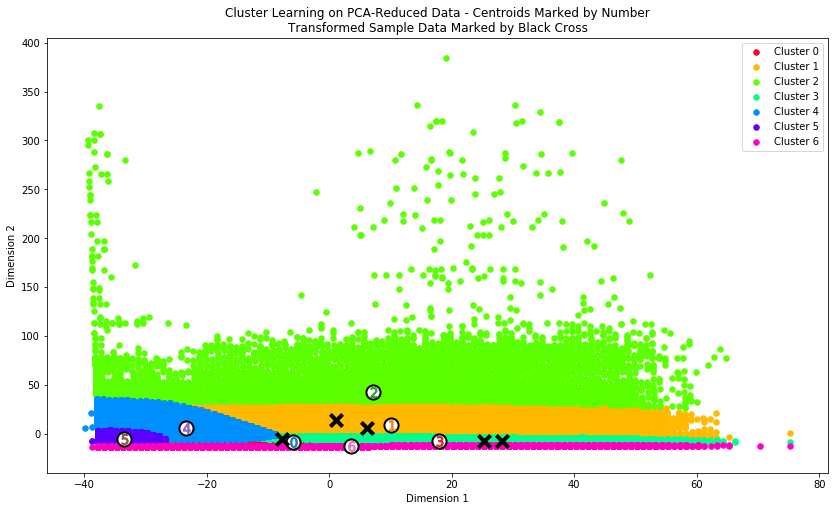

In [9]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

clusterer = GaussianMixture(n_components=7).fit(reduced_data)
samples = reduced_data[1000:1005]
preds = clusterer.predict(reduced_data)
centers = clusterer.means_

vs.cluster_results(reduced_data, preds, centers, samples)

In [10]:
preds_proba = clusterer.predict_proba(samples)

In [11]:
preds_deter = clusterer.predict(samples)

In [12]:
clustered_data = data.assign(cluster = pd.Series(preds))

In [13]:
clustered_data.head()

,age,days_to_appointment,diabetes,alcoholism,hypertension,handicap,smokes,monetary_help,tuberculosis,sms_reminder,...,gender_f,gender_m,week_day_friday,week_day_monday,week_day_saturday,week_day_sunday,week_day_thursday,week_day_tuesday,week_day_wednesday,cluster
0,19,29,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,4
1,24,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,6
2,4,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,6
3,5,15,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,1,0,0,5
4,38,6,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0


In [24]:
pivot = clustered_data.pivot_table(index='cluster', values=['age', 'days_to_appointment', 'show_up'])

(7, 3)

In [25]:
pivot

,age,days_to_appointment,show_up
cluster,,,
0,30.444144,5.210675,0.693486
1,49.374208,24.059423,0.676290
2,45.861171,69.651697,0.648006
3,58.226395,6.833305,0.757253
4,13.207721,21.648077,0.608239
5,3.721510,8.721557,0.675477
6,41.266058,1.476544,0.756711


In [59]:
preds_proba

array([[  1.14129844e-243,   4.44940129e-016,   9.75075893e-001,
          2.32054687e-030,   2.18742784e-002,   7.40684637e-004,
          2.30914418e-003],
       [  2.85780053e-040,   2.80056197e-001,   1.42009512e-001,
          1.66407272e-012,   8.57453355e-003,   4.20000249e-001,
          1.49359509e-001],
       [  1.13299083e-021,   8.53979793e-002,   9.96660784e-002,
          3.85081994e-063,   3.37455738e-003,   8.11561118e-001,
          2.67284102e-007],
       [  0.00000000e+000,   1.71607222e-036,   9.63561017e-001,
          5.71407258e-026,   3.22960745e-002,   1.61118880e-009,
          4.14290673e-003],
       [  1.06623987e-021,   6.49831859e-002,   1.04299807e-001,
          1.32857018e-069,   3.49748246e-003,   8.27219477e-001,
          4.76248217e-008]])

In [87]:
samples.iloc[:, 0]

1000     6.155358
1001    -7.788321
1002    25.224293
1003     1.109549
1004    28.226338
Name: Dimension 1, dtype: float64

In [12]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

score_results = {}
for i in range(2, 8):
    clusterer = GaussianMixture(n_components=i).fit(reduced_data)
    preds = clusterer.predict(reduced_data)
    centers = clusterer.means_
    sample_preds = clusterer.predict(pca_samples)
    score = silhouette_score(reduced_data, preds)
    score_results[i] = score
    print("n_components={}: {}".format(i, round(score, 4)))

n_components = max(score_results, key=score_results.get)
print("\nChosen score: {} | Chosen n_components: {}".format(max(score_results), n_components))

# TODO: Apply your clustering algorithm of choice to the reduced data
clusterer = GaussianMixture(n_components=2).fit(reduced_data)

# TODO: Predict the cluster for each data point
preds = clusterer.predict(reduced_data)

# TODO: Find the cluster centers
centers = clusterer.means_

# TODO: Predict the cluster for each transformed sample data point
# sample_preds = clusterer.predict(pca_samples)

# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
score = silhouette_score(reduced_data, preds)

n_components=2: 0.1973
n_components=3: 0.1712


KeyboardInterrupt: 

In [ ]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)